In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("SPY.csv")
df

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA
0,2014-01-02,2014,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.98,184.07,182.48,182.92,119636900.0,157.02,0.000000,157.020000,157.0200
1,2014-01-03,2014,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2014-00,183.23,183.60,182.63,182.89,81390600.0,156.99,-0.000164,157.005000,157.0050
2,2014-01-06,2014,1,6,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.49,183.56,182.08,182.36,108028200.0,156.54,-0.002898,156.850000,156.8500
3,2014-01-07,2014,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.09,183.79,182.95,183.48,86144200.0,157.50,0.006142,157.012500,157.0125
4,2014-01-08,2014,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2014-01,183.45,183.83,182.89,183.52,96582300.0,157.53,0.000218,157.116000,157.1160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2019-12-24,2019,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.47,321.52,320.90,321.23,20270000.0,310.23,0.000031,305.515000,297.8884
1506,2019-12-26,2019,12,26,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,321.65,322.95,321.64,322.94,30911200.0,311.88,0.005323,306.373571,298.3814
1507,2019-12-27,2019,12,27,<bound method PandasDelegate._add_delegate_acc...,51,2019-51,323.74,323.80,322.28,322.86,42528800.0,311.80,-0.000248,307.030714,298.8820
1508,2019-12-30,2019,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2019-52,322.95,323.10,320.55,321.08,49729100.0,310.08,-0.005513,307.632857,299.3312


In [3]:
df_grouped = df.groupby(['Year', 'Week_Number'])['Return'].agg([np.mean,np.std])
df_grouped.reset_index(['Year', 'Week_Number'], inplace=True)
df_grouped.rename(columns={'mean': 'mean_Return_μ','std':'std_Return_σ'}, inplace=True)

In [4]:
def getWeeklyDifferences(df):
    lastClosePrice = np.asarray(df.groupby(["Year", "Week_Number"]).last()["Close"])
    firstOpenPrice = np.asarray(df.groupby(["Year", "Week_Number"]).first()["Open"])
    return lastClosePrice - firstOpenPrice
def getLabels(df):
    weeklyDifferences = getWeeklyDifferences(df)
    return [1 if x >= 0 else 0 for x in weeklyDifferences]

In [5]:
df_grouped['Weekly_Label']=getLabels(df)
df_grouped['WeeklyDif'] = getWeeklyDifferences(df)
df_grouped.dropna(inplace=True)
df_grouped

,Year,Week_Number,mean_Return_μ,std_Return_σ,Weekly_Label,WeeklyDif
0,2014,0,-0.000082,0.000116,0,-1.09
1,2014,1,0.001368,0.003341,1,0.65
2,2014,2,-0.000509,0.009262,0,-0.03
3,2014,3,-0.006484,0.011004,0,-5.81
4,2014,4,-0.000766,0.008598,0,-0.88
...,...,...,...,...,...,...
311,2019,48,0.000380,0.007765,1,0.28
312,2019,49,0.001560,0.004519,1,2.88
313,2019,50,0.003127,0.002932,1,1.51
314,2019,51,0.001659,0.002564,1,1.27


In [6]:
df_train = df_grouped[df_grouped.Year == 2015]
df_pre = df_grouped[df_grouped.Year == 2016]

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

X_train, y_train = df_train[['mean_Return_μ', 'std_Return_σ']], df_train['Weekly_Label']
X_test, y_test = df_pre[['mean_Return_μ', 'std_Return_σ']], df_pre['Weekly_Label']

from sklearn.preprocessing import StandardScaler
#scale the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### LDA

In [8]:
lda = LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [9]:
#Question1 equation
lda.coef_

array([[3.40522379, 0.18402637]])

In [10]:
lda.intercept_

array([0.35192884])

In [11]:
from sklearn.metrics import accuracy_score
predict_lda = lda.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix(y_test, predict_lda)

array([[19,  3],
       [ 2, 28]], dtype=int64)

In [13]:
print(metrics.classification_report(y_test, predict_lda))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.90      0.93      0.92        30

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



accuracy: 0.90 sencitive rate: 0.93 specificity rate: 0.86

### QDA

In [14]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
qda = QDA()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [15]:
predict_qda = qda.predict(X_test)

In [16]:
confusion_matrix(y_test,predict_qda)

array([[20,  2],
       [ 1, 29]], dtype=int64)

In [17]:
print(metrics.classification_report(y_test, predict_qda))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.94      0.97      0.95        30

    accuracy                           0.94        52
   macro avg       0.94      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



accuracy: 0.94   sensitive rate: 0.97  specificity rate: 0.91

### trading strategy

In [20]:
test = df[df.Year == 2016]
weeklyDifferences = getWeeklyDifferences(test)
weeklyOpens = test.groupby(["Year", "Week_Number"]).first().Open
weeklyCloses = test.groupby(["Year", "Week_Number"]).last().Close

percentGains = np.asarray((weeklyCloses - weeklyOpens) / weeklyOpens)
dailyPercentGains = np.asarray((test.Close - test.Open)/test.Open)

initialInvestment = 100
buyAndHold = [initialInvestment]

In [21]:
#Buy and Hold
#PercentGains are weekly so this will take of the weeks
labels = list(range(len(percentGains) + 1))

for pg in percentGains:
    buyAndHold.append(buyAndHold[-1] * (1 + pg)) if pg >= 0 else buyAndHold.append(buyAndHold[-1] / (1 - pg) )    

In [22]:
#lda portfolio
ldaPortfolio = [initialInvestment]

for index  in range(len(predict_lda)):
    pg = percentGains[index]
    if predict_lda[index] == 1:
        ldaPortfolio.append(ldaPortfolio[-1] * (1 + pg)) if pg >= 0 else ldaPortfolio.append(buyAndHold[-1] / (1 - pg) )  
    else:
        ldaPortfolio.append(ldaPortfolio[-1])

In [23]:
#qda portfolio
qdaPortfolio = [initialInvestment]

for index  in range(len(predict_qda)):
    pg = percentGains[index]
    if predict_qda[index] == 1:
        qdaPortfolio.append(qdaPortfolio[-1] * (1 + pg)) if pg >= 0 else qdaPortfolio.append(buyAndHold[-1] / (1 - pg) )  
    else:
        qdaPortfolio.append(qdaPortfolio[-1])

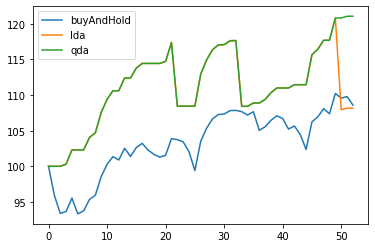

In [28]:
import matplotlib.pyplot as plt
plt.plot(labels, buyAndHold)
plt.plot(labels, ldaPortfolio, label = "lda")
plt.plot(labels, qdaPortfolio, label = 'qda')
plt.legend(["buyAndHold", "lda", "qda"])

       The qda strategy has the best performance. Also, the accuracy of QDA is higher than LDA in this stock.